In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
census_df = pd.read_csv("Census_by_state_all.csv")
census_df.head()

,Name,Population,Poverty Count,No Education,High School Education,GED Education,Associates Degree,Bachelors Degree,Masters Degree,Professional Degree,Doctoral Degree,Poverty Rate,No Degree,Degree
0,Alabama,4841164.0,868666.0,42577.0,828205.0,181388.0,258502.0,492382.0,208839.0,49283.0,32572.0,17.943329,1052170.0,1041578.0
1,Alaska,736855.0,72826.0,3020.0,106169.0,24342.0,39133.0,86551.0,35423.0,8522.0,5029.0,9.883356,133531.0,174658.0
2,Arizona,6728577.0,1165636.0,62538.0,898657.0,179701.0,379207.0,777681.0,333226.0,76987.0,53531.0,17.323663,1140896.0,1620632.0
3,Arkansas,2968472.0,542431.0,23010.0,561132.0,122754.0,127004.0,273557.0,108055.0,24517.0,18317.0,18.273071,706896.0,551450.0
4,California,38654206.0,6004257.0,673089.0,4678279.0,582625.0,1995579.0,5136043.0,2045487.0,597874.0,397083.0,15.533257,5933993.0,10172066.0


In [11]:
# Create national poverty average
poverty_avg = census_df["Poverty Rate"].mean()

# Add No Degree %
census_df["No Degree %"] = census_df["No Degree"] / (census_df["No Degree"] + census_df["Degree"])
census_df["No Degree %"] = round(census_df["No Degree %"]*100,2)

# Add Degree %
census_df["Degree %"] = census_df["Degree"] / (census_df["No Degree"] + census_df["Degree"])
census_df["Degree %"] = round(census_df["Degree %"]*100,2)

# Create national poverty average
degree_avg = census_df["Degree %"].mean()

# Only use necessary columns
census_df = census_df.reindex(columns=["Name", "Population", "Poverty Rate", "Degree %"])

census_df.head()

,Name,Population,Poverty Rate,Degree %
0,Alabama,4841164.0,17.943329,49.75
1,Alaska,736855.0,9.883356,56.67
2,Arizona,6728577.0,17.323663,58.69
3,Arkansas,2968472.0,18.273071,43.82
4,California,38654206.0,15.533257,63.16


In [16]:
stats.chisquare(census_df["Poverty Rate"], census_df["Degree %"])

Power_divergenceResult(statistic=1628.0075917899806, pvalue=2.073679181345529e-307)

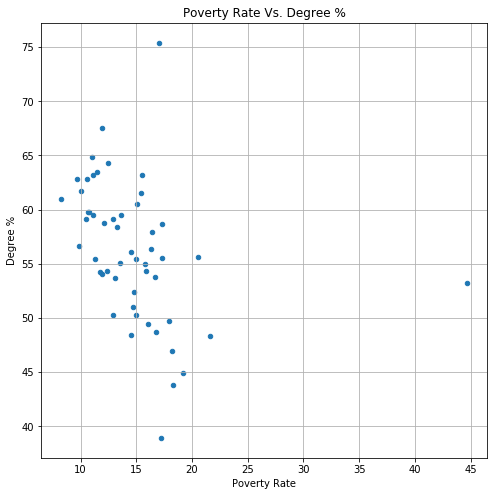

In [28]:
# Create a scatter plot which compares MPG to horsepower
census_df.plot(kind="scatter", x="Poverty Rate", y="Degree %", grid=True, figsize=(8,8),
              title="Poverty Rate Vs. Degree %")


plt.show()